In [1]:
import matplotlib.pyplot as plt
from datetime import datetime

prefix = '/om2/user/hgazula/SynthSeg/scripts/tutorials/logs/mike_synth.out'
postfix = '/om2/user/hgazula/nobrainer_training_scripts/1.2.0/logs/mike_fixed.out'
gcfix = '/om2/user/hgazula/nobrainer_training_scripts/1.2.0/logs/mike_gc.out'

def convert_time(datetime_str):
    # return float(line.split(':')[0]) * 3600 + float(line.split(':')[1]) * 60 + float(line.split(':')[2])
    return datetime.strptime(datetime_str, '%H:%M:%S.%f')

with open(prefix, 'r') as f:
    prefix_lines = f.readlines()

with open(postfix, 'r') as f:
    postfix_lines = f.readlines()

with open(gcfix, 'r') as f:
    gcfix_lines = f.readlines()

prefix_lines = [line.strip() for line in prefix_lines]
postfix_lines = [line.strip() for line in postfix_lines]
gcfix_lines = [line.strip() for line in gcfix_lines]

prefix_lines = [line.split(' ') for line in prefix_lines if 'MB.' in line]
postfix_lines = [line.split(' ') for line in postfix_lines if 'MB.' in line]
gcfix_lines = [line.split(' ') for line in gcfix_lines if 'MB.' in line]

prefix_lines = [(int(line[0]), convert_time(line[1]), float(line[3]), float(line[-2])) for line in prefix_lines]
postfix_lines = [(int(line[0]), convert_time(line[1]), float(line[3]), float(line[-2])) for line in postfix_lines]
gcfix_lines = [(int(line[0]), convert_time(line[1]), float(line[3]), float(line[-2])) for line in gcfix_lines]

Text(0.5, 1.0, 'Memory Usage')

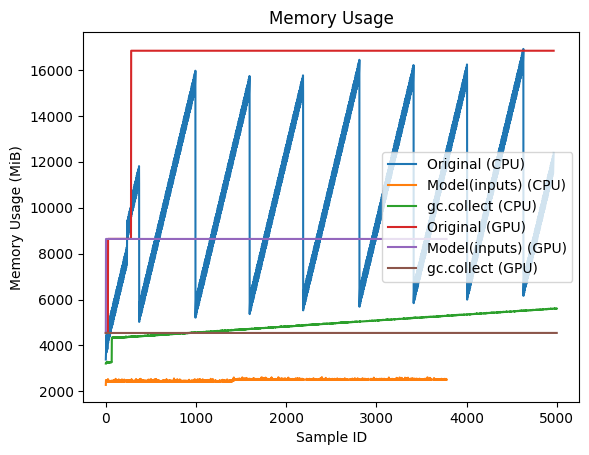

In [2]:
# plot figure
fig, ax = plt.subplots()
ax.plot([line[0] for line in prefix_lines], [line[2] for line in prefix_lines], label='Original (CPU)')
ax.plot([line[0] for line in postfix_lines], [line[2] for line in postfix_lines], label='Model(inputs) (CPU)')
ax.plot([line[0] for line in gcfix_lines], [line[2] for line in gcfix_lines], label='gc.collect (CPU)')
ax.plot([line[0] for line in prefix_lines], [line[3] for line in prefix_lines], label='Original (GPU)')
ax.plot([line[0] for line in postfix_lines], [line[3] for line in postfix_lines], label='Model(inputs) (GPU)')
ax.plot([line[0] for line in gcfix_lines], [line[3] for line in gcfix_lines], label='gc.collect (GPU)')
ax.legend()
plt.xlabel("Sample ID")
plt.ylabel("Memory Usage (MiB)")
plt.title("Memory Usage")

Text(0, 0.5, 'Time (in minutes from start of program)')

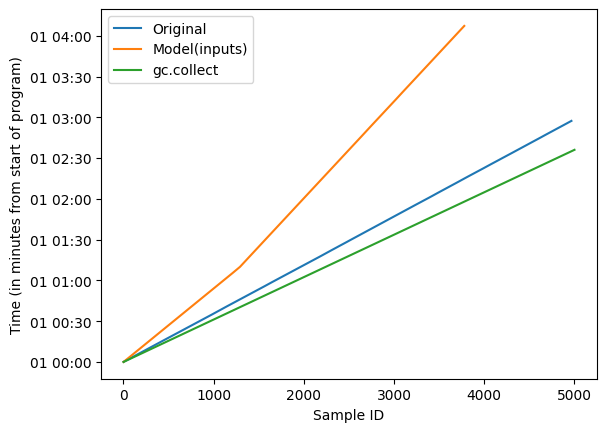

In [3]:
# plot figure
fig, ax = plt.subplots()
ax.plot([line[0] for line in prefix_lines], [line[1] for line in prefix_lines], label='Original')
ax.plot([line[0] for line in postfix_lines], [line[1] for line in postfix_lines], label='Model(inputs)')
ax.plot([line[0] for line in gcfix_lines], [line[1] for line in gcfix_lines], label='gc.collect')
ax.legend()
plt.xlabel("Sample ID")
plt.ylabel("Time (in minutes from start of program)")
# plt.gcf().autofmt_xdate()